In [4]:
import time
import statistics
import matplotlib.pyplot as plt
from random import random, sample, randint

In [5]:
class BinaryEvolution:
    def __init__(self, number_range=(0, 512), mutate_rate=3/4, max_flip_rate=1/6, gen_survival_range=(1/4, 1/2), gen_size=20):
        self.min, self.max = number_range
        self.n_bits = len(bin(self.max)) - 2
        self.target = randint(self.min, self.max)
        self.mutate_rate = mutate_rate
        self.max_flip_rate = max_flip_rate
        self.gen_survival_range = gen_survival_range
        self.gen_size = gen_size
        self.population = [bin(randint(self.min, self.max)) for _ in range(self.gen_size)]

        print(f"Trying numbers between {self.min} and {self.max} ({self.n_bits} bits).")
        print(f"We are looking for {self.target} ({bin(self.target)}).")
        print(f"Generation size is {self.gen_size}.")

    def fitness(self, x):
        return -abs(int(x, base=0) - self.target)

    def step(self):
        """Steps one generation ahead."""
        scores = [{"string": x, "fitness": self.fitness(x)} for x in self.population]
        scores.sort(key=lambda x: x["fitness"], reverse=True)

        # If the correct string has been found, return it.
        if scores[0]["fitness"] == 0:
            return scores[0]["string"]

        # Pick a random number of the best individuals.
        min_survival, max_survival = self.gen_survival_range
        random_best_scores = scores[: randint(int(min_survival * self.gen_size), int(max_survival * self.gen_size)) - 1]
        next_generation = [s["string"] for s in random_best_scores]

        # Combine the existing individuals into new ones to fill next generation.
        while self.gen_size > len(next_generation):
            x1, x2 = sample(next_generation, 2)
            next_generation.append(self.combine(x1, x2))

        # Mutate the population (mutate_rate determines how many get mutated).
        for i in range(len(next_generation)):
            if i > int(self.gen_size * self.mutate_rate):
                next_generation[i] = self.mutate(next_generation[i])

        self.population = next_generation

    def combine(self, x1, x2):
        """Combine binary numbers by randomly picking digits from the two numbers."""
        x1, x2 = self.uniform_length(x1), self.uniform_length(x2)
        return "".join([x1[i] if random() < 0.5 else x2[i] for i in range(len(x1))])

    def mutate(self, x):
        """Flips a random number of bits at random indexes up to the limit defined by self.max_change_rate."""
        x = list(self.uniform_length(x))

        n_mut = randint(0, int(self.n_bits * self.max_flip_rate))  # At most int(flip n_bits * max_mut_rate)
        flip_indexes = sample(range(2, self.n_bits + 2), n_mut)  # Get n_mut random indexes (string starts with 0b)

        for i in flip_indexes:
            x[i] = "1" if (x[i] == "0") else "0"

        return "".join(x)

    def uniform_length(self, x):
        """Returns the byte string with leading zeros so the length is uniform."""
        return format(int(x, base=0), f"#0{self.n_bits + 2}b")

    def find(self, silent=False):
        for i in range(100):
            if not silent:
                print(f"Step {i + 1}: best fitness = {self.fitness(self.population[0])}, avg fitness = {statistics.fmean([self.fitness(i) for i in self.population])}")

            result = self.step()

            if result is not None:
                if not silent:
                    print(f"{self.target} => {result[2:]} was found after {i + 1} steps.")
                break
        

BinaryEvolution().find()

Trying numbers between 0 and 512 (10 bits).
We are looking for 417 (0b110100001).
Generation size is 20.
Step 1: best fitness = -11, avg fitness = -199.3
Step 2: best fitness = -6, avg fitness = -55.45
Step 3: best fitness = -6, avg fitness = -16.75
Step 4: best fitness = -6, avg fitness = -63.0
Step 5: best fitness = -6, avg fitness = -12.25
Step 6: best fitness = -6, avg fitness = -10.0
Step 7: best fitness = -6, avg fitness = -11.4
Step 8: best fitness = -2, avg fitness = -5.6
Step 9: best fitness = -2, avg fitness = -5.85
Step 10: best fitness = -2, avg fitness = -3.4
Step 11: best fitness = -2, avg fitness = -28.2
Step 12: best fitness = -2, avg fitness = -5.2
Step 13: best fitness = -2, avg fitness = -2.0
Step 14: best fitness = -2, avg fitness = -8.85
Step 15: best fitness = -2, avg fitness = -5.5
Step 16: best fitness = -2, avg fitness = -2.1
Step 17: best fitness = -2, avg fitness = -3.4
Step 18: best fitness = -2, avg fitness = -2.1
Step 19: best fitness = -2, avg fitness = -

Trying numbers between 0 and 4 (3 bits).
We are looking for 1 (0b1).
Generation size is 20.
Trying numbers between 0 and 4 (3 bits).
We are looking for 2 (0b10).
Generation size is 20.
Trying numbers between 0 and 4 (3 bits).
We are looking for 4 (0b100).
Generation size is 20.
Trying numbers between 0 and 4 (3 bits).
We are looking for 0 (0b0).
Generation size is 20.
Trying numbers between 0 and 4 (3 bits).
We are looking for 4 (0b100).
Generation size is 20.
Trying numbers between 0 and 4 (3 bits).
We are looking for 3 (0b11).
Generation size is 20.
Trying numbers between 0 and 4 (3 bits).
We are looking for 4 (0b100).
Generation size is 20.
Trying numbers between 0 and 4 (3 bits).
We are looking for 2 (0b10).
Generation size is 20.
Trying numbers between 0 and 4 (3 bits).
We are looking for 0 (0b0).
Generation size is 20.
Trying numbers between 0 and 4 (3 bits).
We are looking for 1 (0b1).
Generation size is 20.
Trying numbers between 0 and 4 (3 bits).
We are looking for 0 (0b0).
Ge

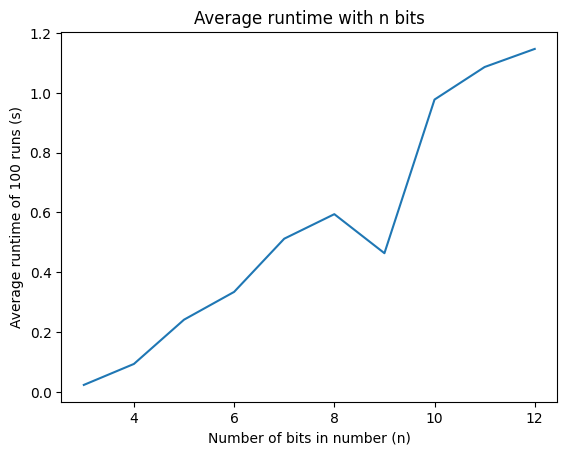

In [8]:
n_runs = 100
n_bit_range = (3, 13)
bes = []
times = []

for i in range(*n_bit_range):
    total_time = 0

    for r in range(n_runs):
        be = BinaryEvolution(number_range=(0, 2**(i-1)))
        start_time = time.time_ns()
        be.find(silent=True)
        end_time = time.time_ns()
        total_time += (end_time - start_time) / 10**7

    times.append(total_time / n_runs)

plt.figure()
plt.title("Average runtime with n bits")
plt.xlabel("Number of bits in number (n)")
plt.ylabel(f"Average runtime of {n_runs} runs (s)")
plt.plot(range(*n_bit_range), times)
